In [1]:
!pwd

/panda/eedy/ion_los-angle/s1_a064/notebook


In [2]:
from mintpy.objects import ramp
from mintpy.utils import ptime, readfile, writefile
import h5py
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors
from mintpy.utils import ptime, readfile, writefile
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [3]:
######### split

In [4]:
path_split = '../mintpy_split_ion_upsample/geo/geo_ion-split.h5'

In [5]:
!reference_point.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 -y 180 -x 190
!reference_date.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 --ref-date 20190123

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed
--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
SAME reference pixel is already selected/saved in file, skip updating.
input reference date: 20190123
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a064/mintpy_split_ion_upsample/geo/geo_ion-split.h5
reading data ...
referencing in time ...
--------------------------------------------------
open  HDF5 file /panda/eedy/ion_los-angle/s1_a064/mintpy_split_ion_upsample/geo/geo_ion-split.h5 in r+ mode
writing dataset /timeseries                block: (0, 291, 0, 824, 0, 314)
close HDF5 file /panda/eedy/ion_los-angle/s1_a064/mintpy_split_ion_upsample/geo/geo_ion-split.h5.
update "REF_DATE" attribute value to 20190123
time used: 00 mins 4.0 secs.


In [6]:
timeseries_split = readfile.read(path_split, datasetName='timeseries')[0]
timeseries_split = np.squeeze(timeseries_split)
data_out, ramp = ramp.deramp(timeseries_split, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [7]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_split = np.zeros(timeseries_split.shape[0])
slope_ion_split_dongxifangxiang = np.zeros(timeseries_split.shape[0])
slope_ion_split_nanbeifangxiang = np.zeros(timeseries_split.shape[0])
angle_deg_ion_split = np.zeros(timeseries_split.shape[0])
meta = readfile.read_attribute(path_split)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_split.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( cm(ion)/ 100km(juli)):', magnitude*1e7)
    print('The direction of the gradient is:', direction)

    slope_ion_split[i] = magnitude*1e7
    angle_deg_ion_split[i] = direction
    slope_ion_split_dongxifangxiang[i] = dy*1e7
    slope_ion_split_nanbeifangxiang[i] = dx*1e7

    print(i)


The equation of the fit plane is: Z = 0.00042803414498557085 * X + 7.77923480989524e-05 * Y + -0.11607791471128656
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 2.958893899521516
The direction of the gradient is: 157.90186747655673
0
The equation of the fit plane is: Z = 0.0004585573404848698 * X + 5.430340633595681e-05 * Y + -0.11399336794141077
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 3.038081082351254
The direction of the gradient is: 165.181392692464
1
The equation of the fit plane is: Z = 0.00033212823356667403 * X + 5.157713529977517e-05 * Y + -0.09309428205565863
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 2.251645820578738
The direction of the gradient is: 160.8668690546126
2
The equation of the fit plane is: Z = 0.00015899246137719423 * X + 0.0001901179075619792 * Y + -0.10020989206410602
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 2.9047218257530694
The direction of the gradient is: 110.52281521615566
3
The equation of the 

In [8]:
######### GIM

In [9]:
path_GIM = '../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5'

In [10]:
!reference_point.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 -y 180 -x 190
!reference_date.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 --ref-date 20190123

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed
--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
calculating the temporal average of timeseries file: ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5
reading timeseries data from file: ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 ...
/home/eedy/tools/MintPy/src/mintpy/objects/stack.py:455: RuntimeWarning: Mean of empty slice
  dmean = np.nanmean(data, axis=0)
updating dataset values without re-writing to a new file
update metadata
input reference date: 20190123
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a064/mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5
reading data ...
referencing in time ...
--------------------------------------------------
open  HDF5 file /panda/eedy/ion_los-angle/s1_a064/mintpy_gim_ion_upsample/geo/geo_

In [11]:
timeseries_GIM = readfile.read(path_GIM, datasetName='timeseries')[0]
timeseries_GIM = np.squeeze(timeseries_GIM)
from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_GIM, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [12]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_GIM = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_dongxifangxiang = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_nanbeifangxiang = np.zeros(timeseries_GIM.shape[0])
angle_deg_ion_GIM = np.zeros(timeseries_GIM.shape[0])
meta = readfile.read_attribute(path_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( cm(ion)/ 100km(juli)):', magnitude*1e7)
    print('The direction of the gradient is:', direction)

    slope_ion_GIM[i] = magnitude*1e7
    angle_deg_ion_GIM[i] = direction
    slope_ion_GIM_dongxifangxiang[i] = dy*1e7
    slope_ion_GIM_nanbeifangxiang[i] = dx*1e7

    print(i)


The equation of the fit plane is: Z = 8.550256479911767e-05 * X + 0.00010576940959482325 * Y + -0.03392772329564047
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 1.6094727194598821
The direction of the gradient is: 109.89272473275452
0
The equation of the fit plane is: Z = 7.979635970417448e-05 * X + 7.071983298605253e-05 * Y + -0.027507580129694398
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 1.133664070839775
The direction of the gradient is: 116.797045512762
1
The equation of the fit plane is: Z = 7.249941112248797e-05 * X + 3.626524857183374e-05 * Y + -0.019929207092345223
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.696345375743926
The direction of the gradient is: 131.8240784216435
2
The equation of the fit plane is: Z = 8.573378675581302e-05 * X + 3.832878481054741e-05 * Y + -0.022697989043601527
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.776092886508922
The direction of the gradient is: 135.03549366925898
3
The equation of th

In [13]:
with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

slope_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_correct[i] = slope_ion_GIM[j[0]]
slope_ion_GIM = slope_ion_GIM_correct

angle_deg_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        angle_deg_ion_GIM_correct[i] = angle_deg_ion_GIM[j[0]]
angle_deg_ion_GIM = angle_deg_ion_GIM_correct

slope_ion_GIM_dongxifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_dongxifangxiang_correct[i] = slope_ion_GIM_dongxifangxiang[j[0]]
slope_ion_GIM_dongxifangxiang = slope_ion_GIM_dongxifangxiang_correct

slope_ion_GIM_nanbeifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_nanbeifangxiang_correct[i] = slope_ion_GIM_nanbeifangxiang[j[0]]
slope_ion_GIM_nanbeifangxiang = slope_ion_GIM_nanbeifangxiang_correct

In [14]:
######### hight_GIM

In [15]:
path_hight_GIM = '../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5'

In [16]:
!reference_point.py ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 -y 180 -x 190
!reference_date.py ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 --ref-date 20190123

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed
--------------------------------------------------
input reference point in y/x: (180, 190)
--------------------------------------------------
calculating the temporal average of timeseries file: ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5
reading timeseries data from file: ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 ...
/home/eedy/tools/MintPy/src/mintpy/objects/stack.py:455: RuntimeWarning: Mean of empty slice
  dmean = np.nanmean(data, axis=0)
updating dataset values without re-writing to a new file
update metadata
input reference date: 20190123
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a064/mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5
reading data ...
referencing in time ...
--------------------------------------------------
open  HDF5 file /panda/eedy/ion_los-angle/s1_a

In [17]:
timeseries_hight_GIM = readfile.read(path_hight_GIM, datasetName='timeseries')[0]
timeseries_hight_GIM = np.squeeze(timeseries_hight_GIM)
from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_hight_GIM, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [18]:
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_hight_GIM = np.zeros(timeseries_hight_GIM.shape[0])
slope_ion_hight_GIM_dongxifangxiang = np.zeros(timeseries_hight_GIM.shape[0])
slope_ion_hight_GIM_nanbeifangxiang = np.zeros(timeseries_hight_GIM.shape[0])
angle_deg_ion_hight_GIM = np.zeros(timeseries_hight_GIM.shape[0])
meta = readfile.read_attribute(path_hight_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_hight_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    print('The magnitude of the gradient is( cm(ion)/ 100km(juli)):', magnitude*1e7)
    print('The direction of the gradient is:', direction)

    slope_ion_hight_GIM[i] = magnitude*1e7
    angle_deg_ion_hight_GIM[i] = direction
    slope_ion_hight_GIM_dongxifangxiang[i] = dy*1e7
    slope_ion_hight_GIM_nanbeifangxiang[i] = dx*1e7
    

    print(i)


The equation of the fit plane is: Z = 0.00011218098252012552 * X + 8.20037105132502e-05 * Y + -0.0360027855280827
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 1.375891481609253
The direction of the gradient is: 121.48105071468876
0
The equation of the fit plane is: Z = 0.0001107767688627727 * X + 5.9369069683825896e-05 * Y + -0.03228335020668325
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 1.106829868521301
The direction of the gradient is: 129.86922203733093
1
The equation of the fit plane is: Z = 0.00010142780459400742 * X + 2.9637595700027434e-05 * Y + -0.025160741664559536
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.7758062589547833
The direction of the gradient is: 146.86381896047317
2
The equation of the fit plane is: Z = 0.00011308101944088862 * X + 4.470368522243996e-05 * Y + -0.029917939551078108
The magnitude of the gradient is( cm(ion)/ 100km(juli)): 0.9663026672097335
The direction of the gradient is: 138.55014240048672
3
The equation 

In [19]:
with h5py.File(path_hight_GIM, 'r') as file:
    date_hight_GIM = file['date']
    date_hight_GIM = date_hight_GIM[()]
date_hight_GIM = np.char.decode(date_hight_GIM)

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

slope_ion_hight_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_correct[i] = slope_ion_hight_GIM[j[0]]
slope_ion_hight_GIM = slope_ion_hight_GIM_correct

angle_deg_ion_hight_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        angle_deg_ion_hight_GIM_correct[i] = angle_deg_ion_hight_GIM[j[0]]
angle_deg_ion_hight_GIM = angle_deg_ion_hight_GIM_correct

slope_ion_hight_GIM_dongxifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_dongxifangxiang_correct[i] = slope_ion_hight_GIM_dongxifangxiang[j[0]]
slope_ion_hight_GIM_dongxifangxiang = slope_ion_hight_GIM_dongxifangxiang_correct

slope_ion_hight_GIM_nanbeifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_nanbeifangxiang_correct[i] = slope_ion_hight_GIM_nanbeifangxiang[j[0]]
slope_ion_hight_GIM_nanbeifangxiang = slope_ion_hight_GIM_nanbeifangxiang_correct

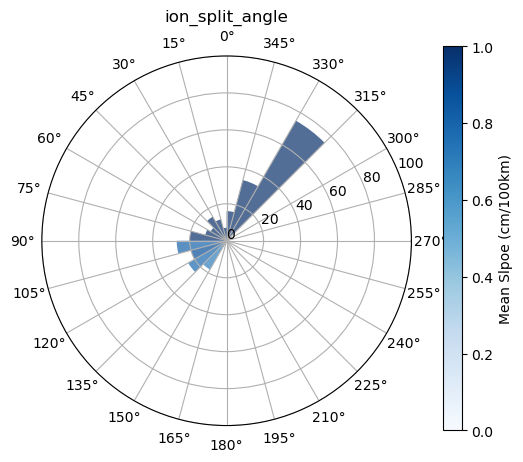

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_split 和 slope_ion_split 是已经定义好的 numpy 数组
# 转换为弧度
ion_split_angle_deg_rad = np.deg2rad(angle_deg_ion_split)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_split_angle_deg_rad, slope_ion_split, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
#colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))
colors = plt.get_cmap('Blues')(bin_means)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_split_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
#ax.set_yticklabels([])  # 删除y轴标签
#ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_split_angle')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # 定义颜色条的位置和大小
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Mean Slpoe (cm/100km)')

# 在径向上添加长度刻度
#ax.set_yticks(np.linspace(0, max(n), 5))  # 设置刻度范围和数量
ax.set_yticks(np.linspace(0, 100, 6))

plt.show()

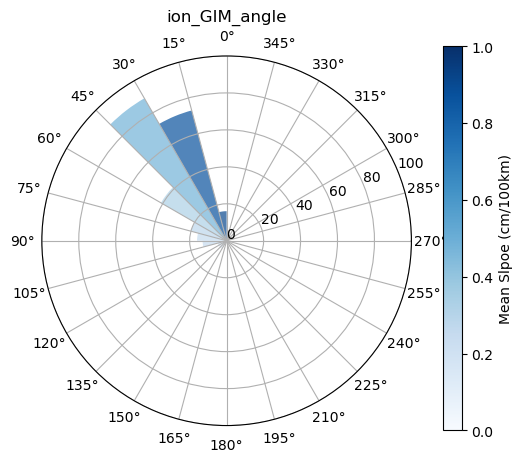

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_GIM 和 slope_ion_GIM 是已经定义好的 numpy 数组
# 转换为弧度
ion_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_GIM)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_GIM_angle_deg_rad, slope_ion_GIM, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
#colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))
colors = plt.get_cmap('Blues')(bin_means)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_GIM_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
#ax.set_yticklabels([])  # 删除y轴标签
#ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_GIM_angle')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # 定义颜色条的位置和大小
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Mean Slpoe (cm/100km)')

# 在径向上添加长度刻度
#ax.set_yticks(np.linspace(0, max(n), 5))  # 设置刻度范围和数量
ax.set_yticks(np.linspace(0, 100, 6))

plt.show()

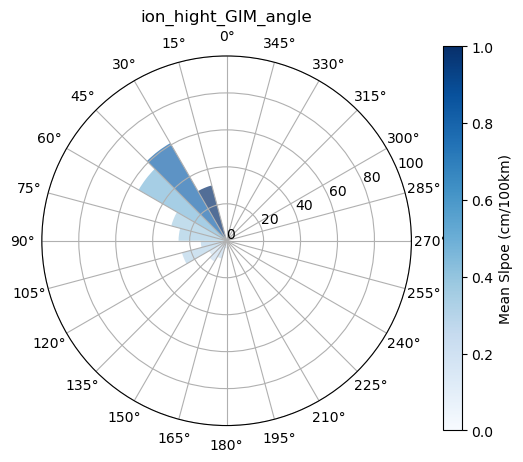

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 假设 angle_deg_ion_GIM 和 slope_ion_GIM 是已经定义好的 numpy 数组
# 转换为弧度
ion_hight_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_hight_GIM)

# 计算每个bin中的均值
bin_means, bin_edges, _ = binned_statistic(ion_hight_GIM_angle_deg_rad, slope_ion_hight_GIM, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

# 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
#colors = plt.get_cmap('Blues')(bin_means / np.nanmax(bin_means))
colors = plt.get_cmap('Blues')(bin_means)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# 绘制直方图，颜色由均值决定
n, bins, patches = ax.hist(ion_hight_GIM_angle_deg_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

# 清除常规极坐标图的细节
#ax.set_yticklabels([])  # 删除y轴标签
#ax.set_yticks([])  # 删除y轴刻度

# 设置x轴标签为0-360度
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
ax.set_xticklabels(['270°','285°', '300°','315°', '330°','345°' ,'0°','15°', '30°','45°', '60°','75°', '90°','105°', '120°','135°', '150°','165°', '180°','195°', '210°','225°', '240°','255°'])

# 设置直方图的颜色
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

ax.grid(True)  # 显示网格线
ax.set_title('ion_hight_GIM_angle')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # 定义颜色条的位置和大小
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Mean Slpoe (cm/100km)')

# 在径向上添加长度刻度
#ax.set_yticks(np.linspace(0, max(n), 5))  # 设置刻度范围和数量
ax.set_yticks(np.linspace(0, 100, 6))

plt.show()

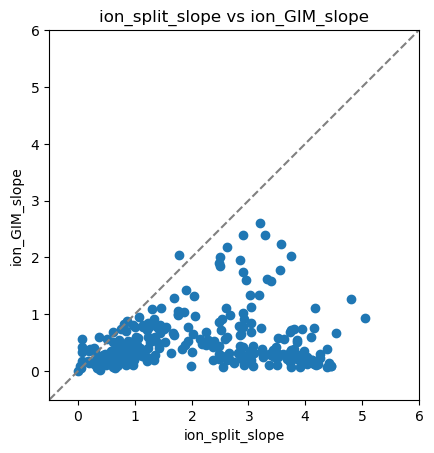

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split, slope_ion_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope')
plt.ylabel('ion_GIM_slope')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.5,6]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

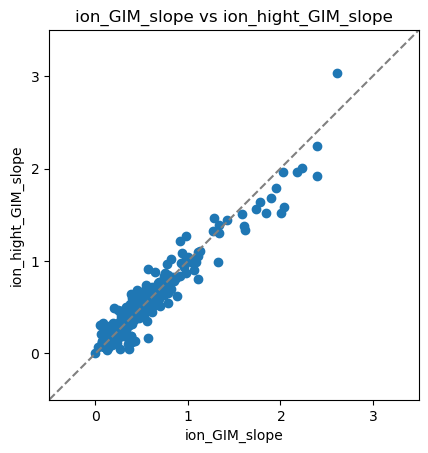

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_GIM, slope_ion_hight_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_GIM_slope')
plt.ylabel('ion_hight_GIM_slope')

# 添加标题
plt.title('ion_GIM_slope vs ion_hight_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.5,3.5]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

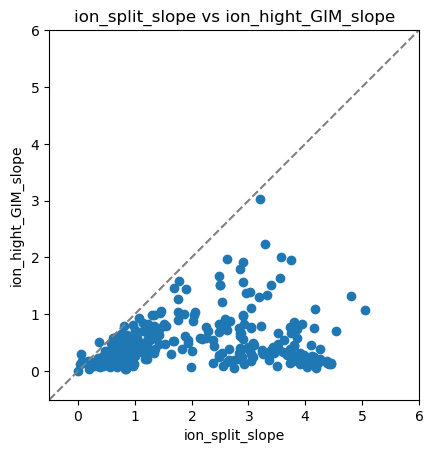

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split, slope_ion_hight_GIM)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope')
plt.ylabel('ion_hight_GIM_slope')

# 添加标题
plt.title('ion_split_slope vs ion_hight_GIM_slope')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.5,6]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

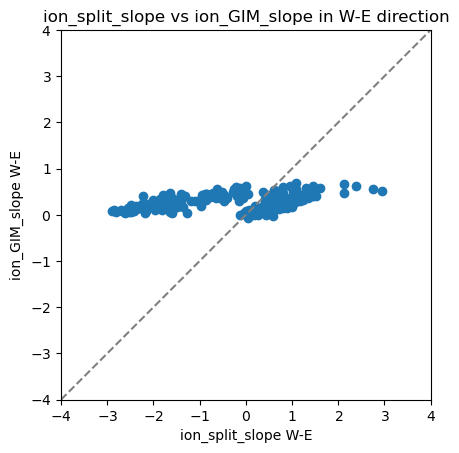

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_dongxifangxiang, slope_ion_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope W-E')
plt.ylabel('ion_GIM_slope W-E')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-4, 4]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

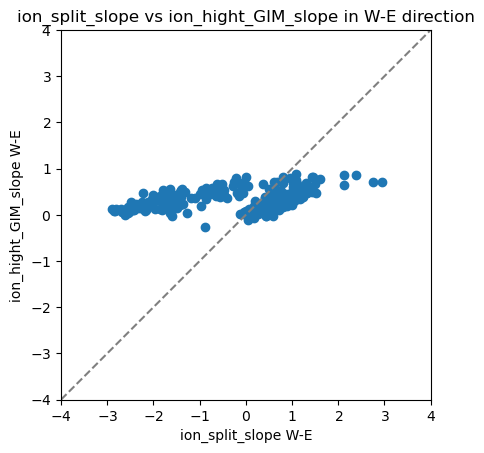

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_dongxifangxiang, slope_ion_hight_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope W-E')
plt.ylabel('ion_hight_GIM_slope W-E')

# 添加标题
plt.title('ion_split_slope vs ion_hight_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-4, 4]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

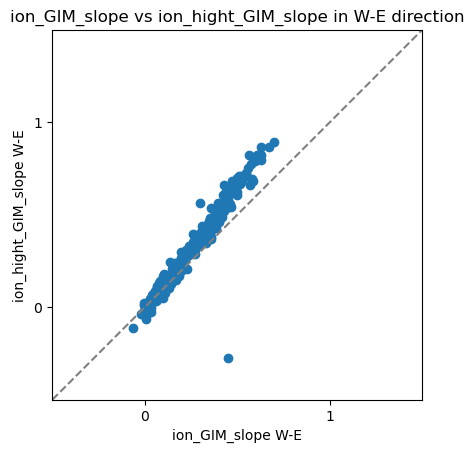

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_GIM_dongxifangxiang, slope_ion_hight_GIM_dongxifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_GIM_slope W-E')
plt.ylabel('ion_hight_GIM_slope W-E')

# 添加标题
plt.title('ion_GIM_slope vs ion_hight_GIM_slope in W-E direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-0.5, 1.5]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

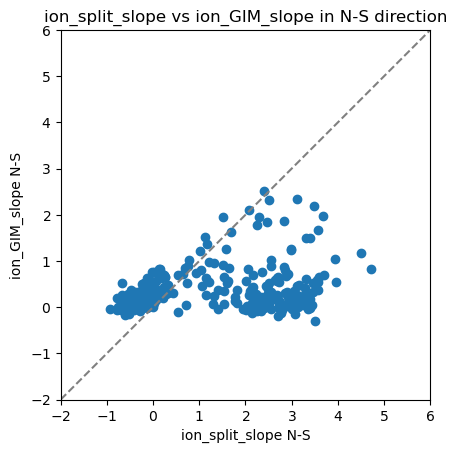

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_nanbeifangxiang, slope_ion_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope N-S')
plt.ylabel('ion_GIM_slope N-S')

# 添加标题
plt.title('ion_split_slope vs ion_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 6]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

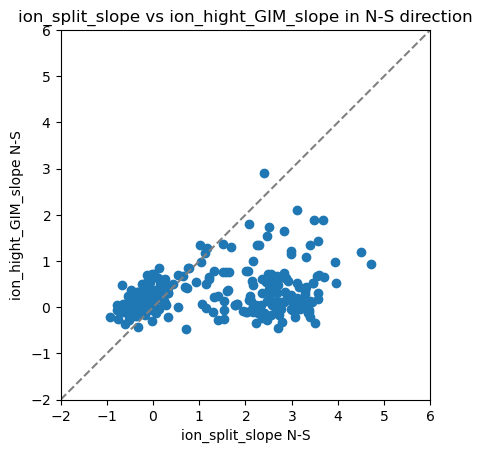

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_split_nanbeifangxiang, slope_ion_hight_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_split_slope N-S')
plt.ylabel('ion_hight_GIM_slope N-S')

# 添加标题
plt.title('ion_split_slope vs ion_hight_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-2, 6]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

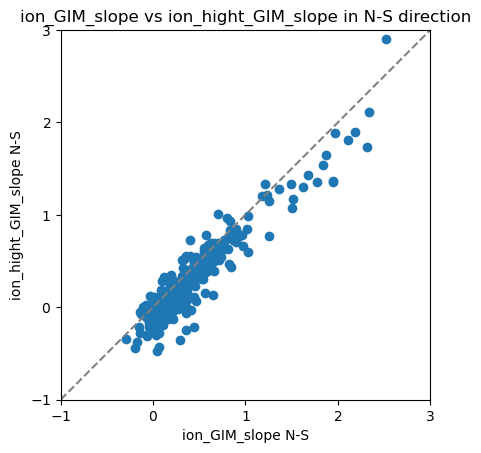

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 创建一个新的图像
plt.figure()

# 绘制散点图
plt.scatter(slope_ion_GIM_nanbeifangxiang, slope_ion_hight_GIM_nanbeifangxiang)

# 为x轴和y轴添加标签
plt.xlabel('ion_GIM_slope N-S')
plt.ylabel('ion_hight_GIM_slope N-S')

# 添加标题
plt.title('ion_GIM_slope vs ion_hight_GIM_slope in N-S direction')

# 设置横轴和纵轴的范围和跨度相同
xlim = ylim = [-1, 3]
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect('equal')

# 添加虚线x=y
plt.plot(xlim, ylim, linestyle='dashed', color='gray')

# 设置横纵坐标的间隔
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=1))

# 调整刻度标签的格式
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

# 显示图像
plt.show()

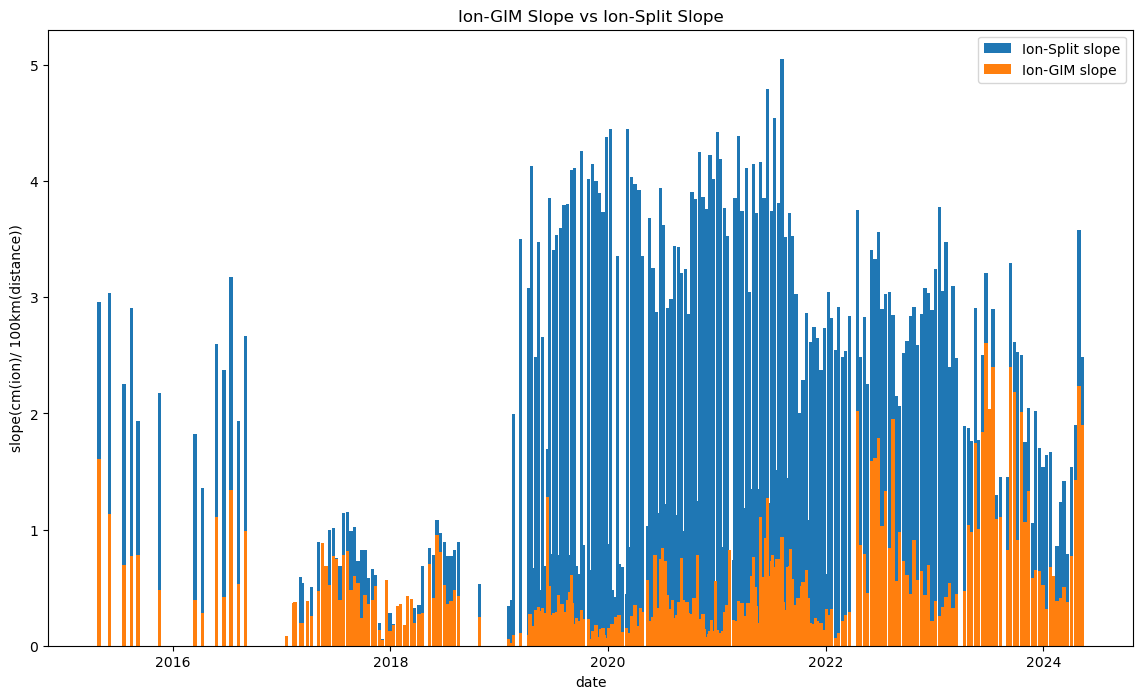

In [32]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split, width, label='Ion-Split slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM, width, label='Ion-GIM slope', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(cm(ion)/ 100km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope')
ax.legend()

plt.show()

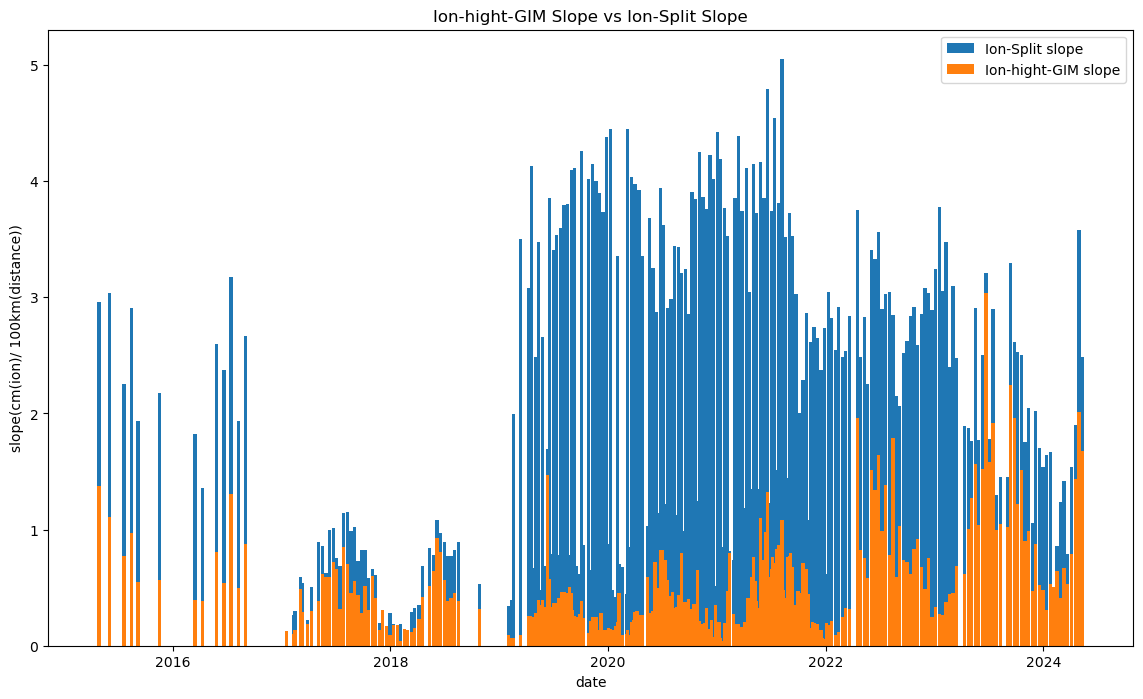

In [33]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split, width, label='Ion-Split slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM, width, label='Ion-hight-GIM slope', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-Split Slope')
ax.legend()

plt.show()

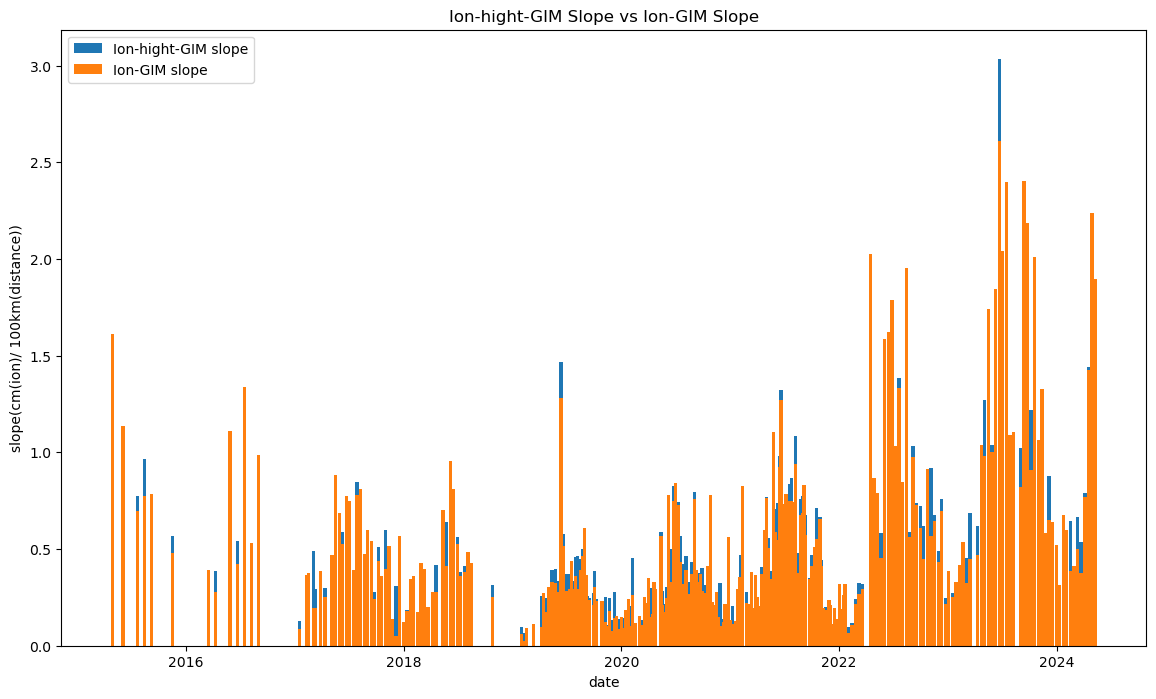

In [34]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]


ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM, width, label='Ion-hight-GIM slope', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM, width, label='Ion-GIM slope', alpha=1)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope(cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-GIM Slope')
ax.legend()

plt.show()

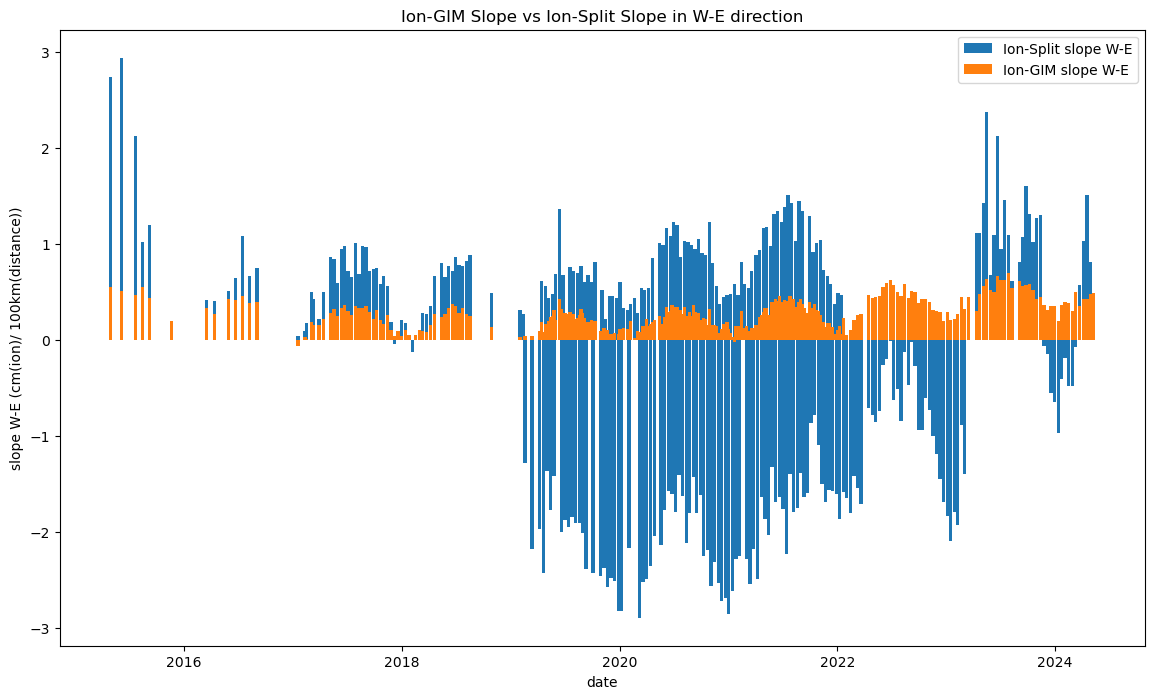

In [35]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_dongxifangxiang, width, label='Ion-Split slope W-E', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_dongxifangxiang, width, label='Ion-GIM slope W-E', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (cm(ion)/ 100km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in W-E direction')
ax.legend()

plt.show()

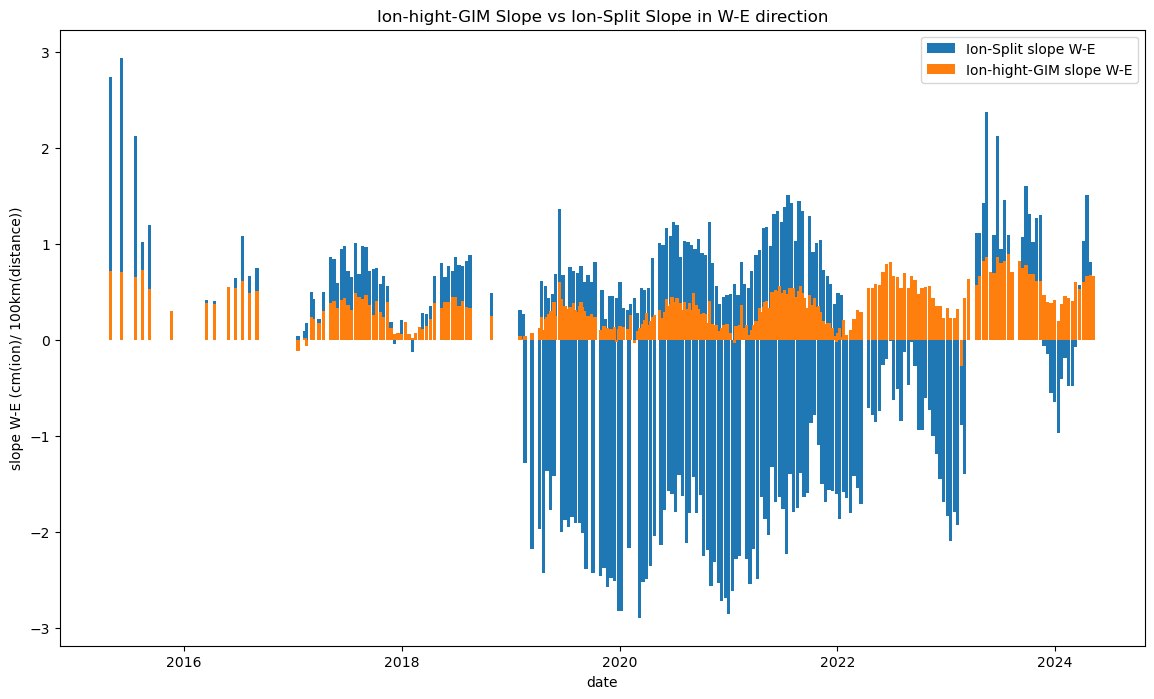

In [36]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_dongxifangxiang, width, label='Ion-Split slope W-E', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_dongxifangxiang, width, label='Ion-hight-GIM slope W-E', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-Split Slope in W-E direction')
ax.legend()

plt.show()

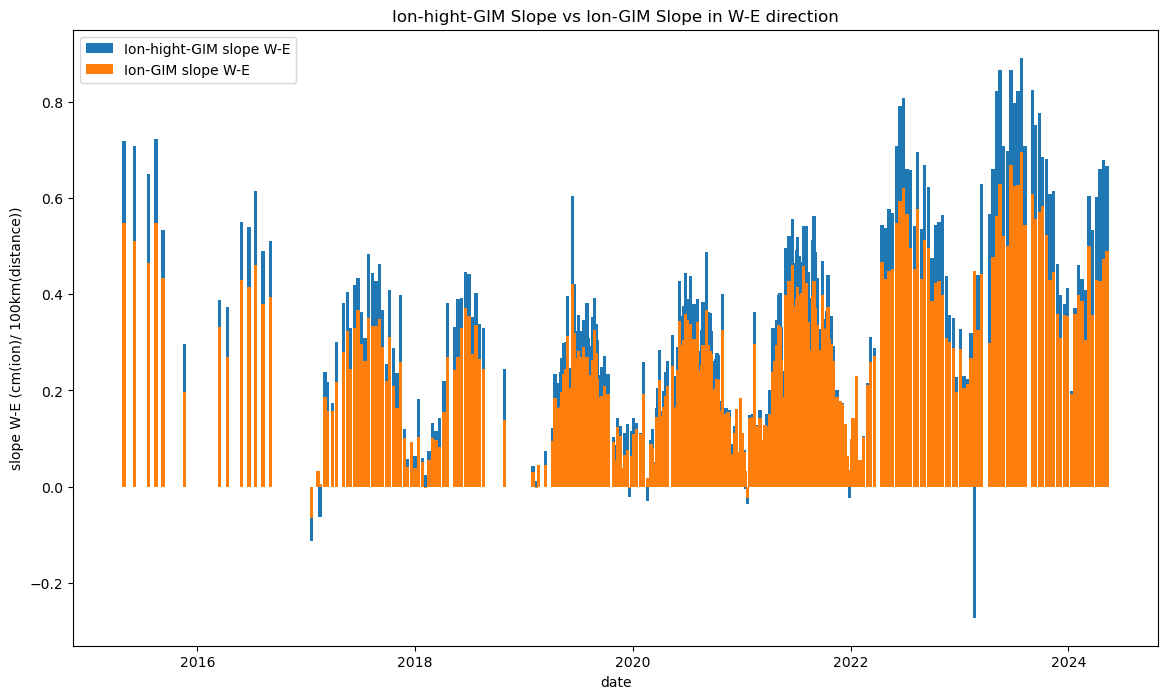

In [37]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_dongxifangxiang, width, label='Ion-hight-GIM slope W-E', alpha=1) 
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_dongxifangxiang, width, label='Ion-GIM slope W-E', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope W-E (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-GIM Slope in W-E direction')
ax.legend()

plt.show()

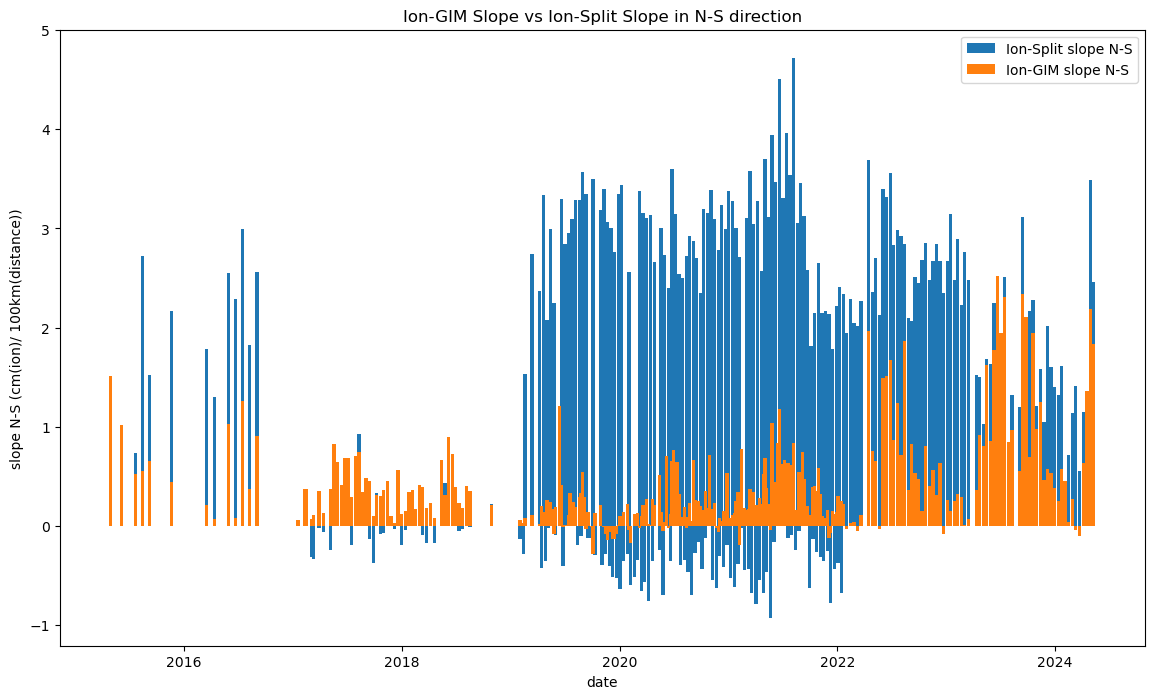

In [38]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_nanbeifangxiang, width, label='Ion-Split slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_nanbeifangxiang, width, label='Ion-GIM slope N-S', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (cm(ion)/ 100km(distance))')
ax.set_title('Ion-GIM Slope vs Ion-Split Slope in N-S direction')

ax.legend()

plt.show()

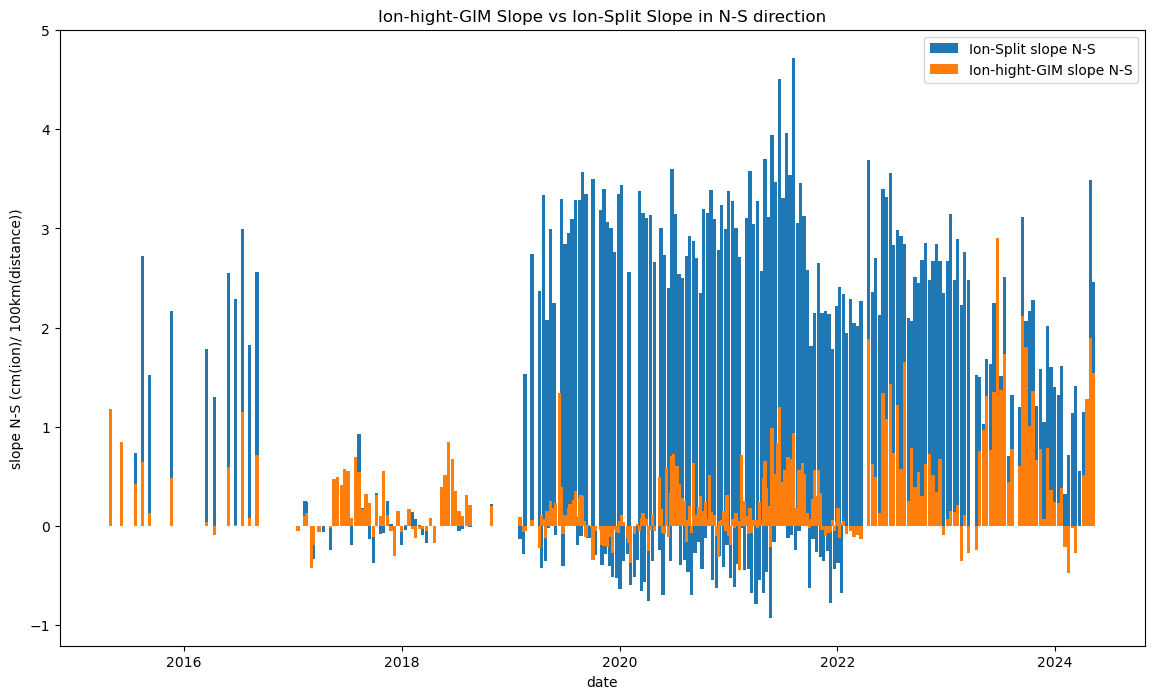

In [39]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, slope_ion_split_nanbeifangxiang, width, label='Ion-Split slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_nanbeifangxiang, width, label='Ion-hight-GIM slope N-S', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-Split Slope in N-S direction')

ax.legend()

plt.show()

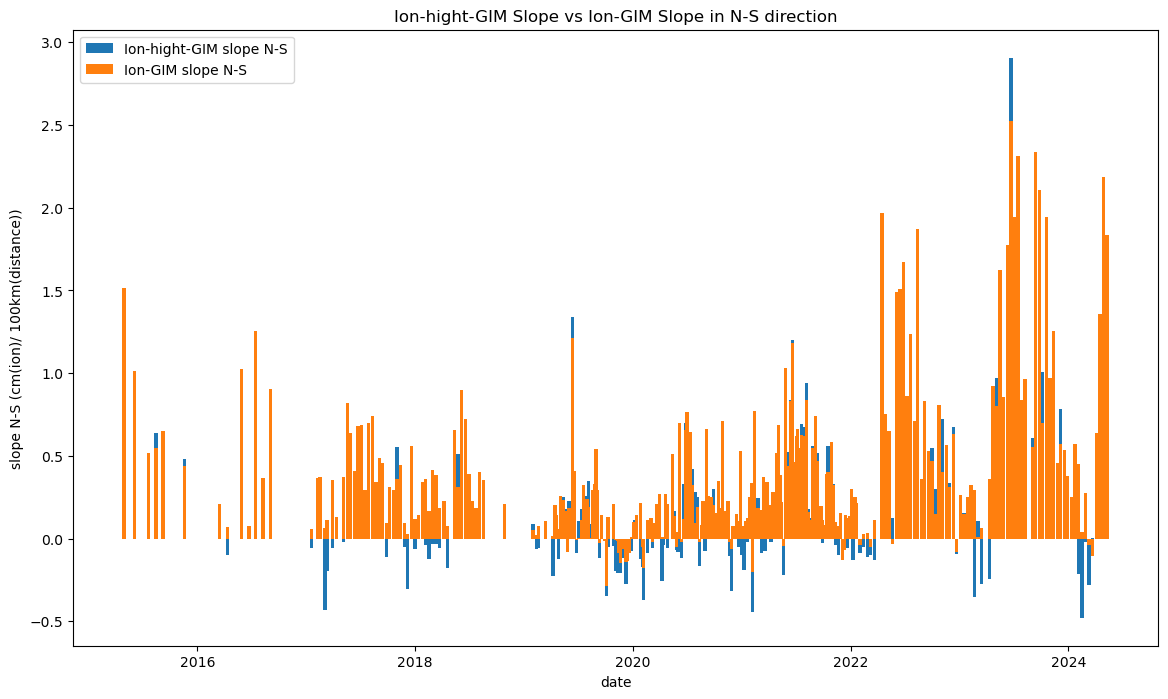

In [40]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(np.array(date_GIM_numeric), slope_ion_hight_GIM_nanbeifangxiang, width, label='Ion-hight-GIM slope N-S', alpha=1)
ax.bar(np.array(date_GIM_numeric), slope_ion_GIM_nanbeifangxiang, width, label='Ion-GIM slope N-S', alpha=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('slope N-S (cm(ion)/ 100km(distance))')
ax.set_title('Ion-hight-GIM Slope vs Ion-GIM Slope in N-S direction')

ax.legend()

plt.show()

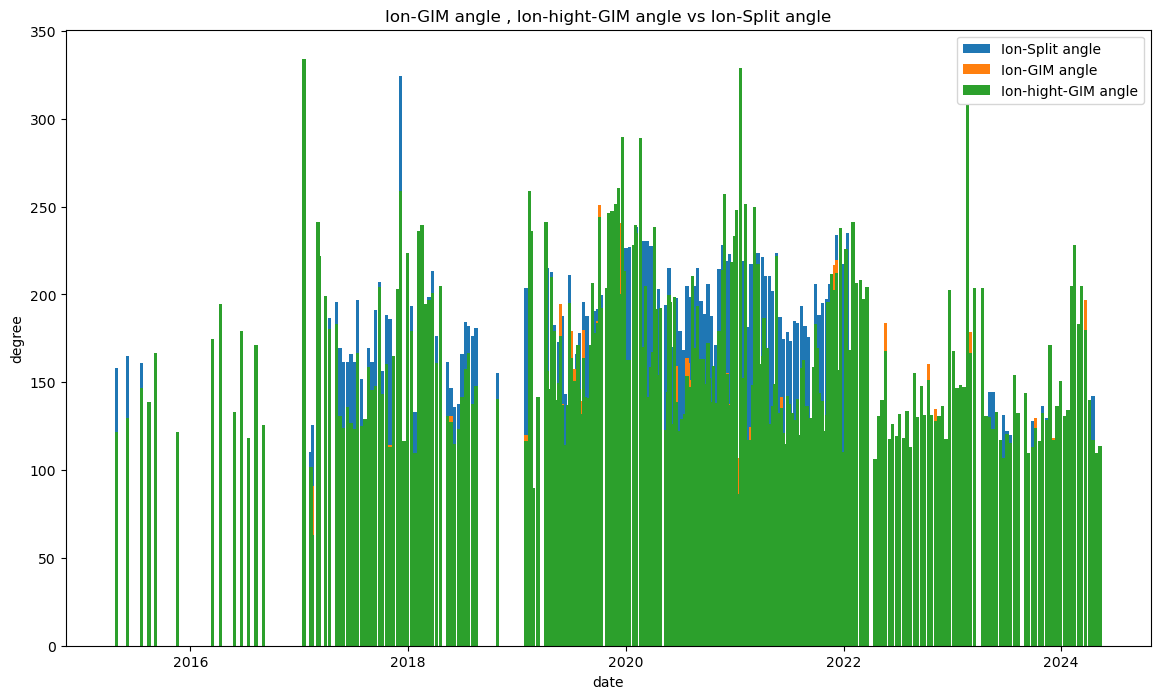

In [41]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14,8))  # 设置图像大小

width = 0.03  # 更改柱状图的宽度
year = [int(date[:4]) for date in date_split]
month = [int(date[4:6]) for date in date_split]
day = [int(date[6:8]) for date in date_split]
date_GIM_numeric = [y + 1/12*m + 1/12/30*d for y, m, d in zip(year, month, day)]

ax.bar(date_GIM_numeric, angle_deg_ion_split, width, label='Ion-Split angle', alpha=1)
ax.bar(date_GIM_numeric, angle_deg_ion_GIM, width, label='Ion-GIM angle', alpha=1) 
ax.bar(date_GIM_numeric, angle_deg_ion_hight_GIM, width, label='Ion-hight-GIM angle', alpha=1) 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('date')
ax.set_ylabel('degree')
ax.set_title('Ion-GIM angle , Ion-hight-GIM angle vs Ion-Split angle')
ax.legend()

plt.show()